# 2. Visualizing Two Quantitative Variables

Dalam bab ini, Anda akan membuat dan menyesuaikan plot yang **memvisualisasikan hubungan antara dua variabel kuantitatif**. Untuk melakukan ini, Anda akan menggunakan **scatter plot** dan **line plot** untuk mengeksplorasi bagaimana tingkat polusi udara di kota berubah sepanjang hari dan bagaimana tenaga kuda berhubungan dengan efisiensi bahan bakar di mobil. Anda juga akan melihat keuntungan besar lain menggunakan Seaborn - kemampuan untuk dengan mudah membuat subplot dalam satu gambar!

## Introduction to relational plots and subplots

### Creating subplots with col and row

Kami telah melihat dalam latihan sebelumnya bahwa siswa dengan lebih banyak absensi (`"absences"`) cenderung memiliki nilai akhir yang lebih rendah (`"G3"`). Apakah hubungan ini berlaku terlepas dari berapa banyak waktu yang siswa pelajari setiap minggu?

Untuk menjawab ini, kita akan melihat hubungan antara jumlah absen yang dimiliki seorang siswa di sekolah dan nilai akhir mereka di kursus, membuat subplot terpisah berdasarkan waktu belajar mingguan setiap siswa (`"study_time"`).

In [2]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set seaborn style
sns.set()

In [3]:
# Load data
student_data = pd.read_csv('datasets/student-alcohol-consumption.csv', index_col=0)
student_data.sample(5)

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
26,GP,M,15,GT3,T,2,2,1,0,no,...,2,1,2,5,2,12,12,11,Urban,<2 hours
178,GP,M,16,GT3,T,4,2,1,0,no,...,3,3,4,3,10,10,8,9,Rural,<2 hours
218,GP,F,17,GT3,T,2,3,2,0,no,...,3,1,4,3,3,7,7,8,Urban,<2 hours
332,GP,F,18,GT3,T,3,3,1,0,no,...,4,1,1,4,0,7,0,0,Urban,2 to 5 hours
362,MS,F,18,GT3,T,3,3,2,0,no,...,2,1,3,3,0,11,11,10,Urban,2 to 5 hours


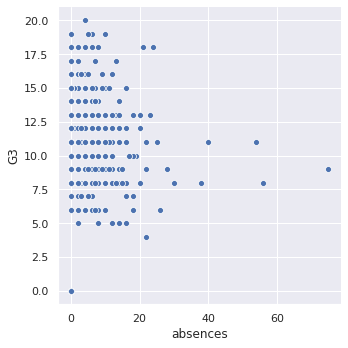

In [4]:
# Change to use relplot() instead of scatterplot()
sns.relplot(x="absences", y="G3", 
                data=student_data, kind="scatter")

# Show plot
plt.show()

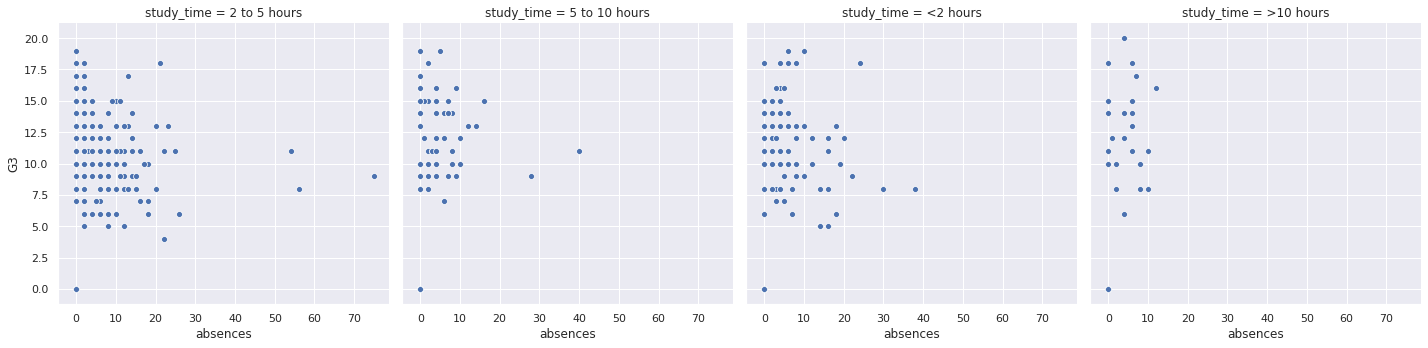

In [5]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter",
            col="study_time")

# Show plot
plt.show()

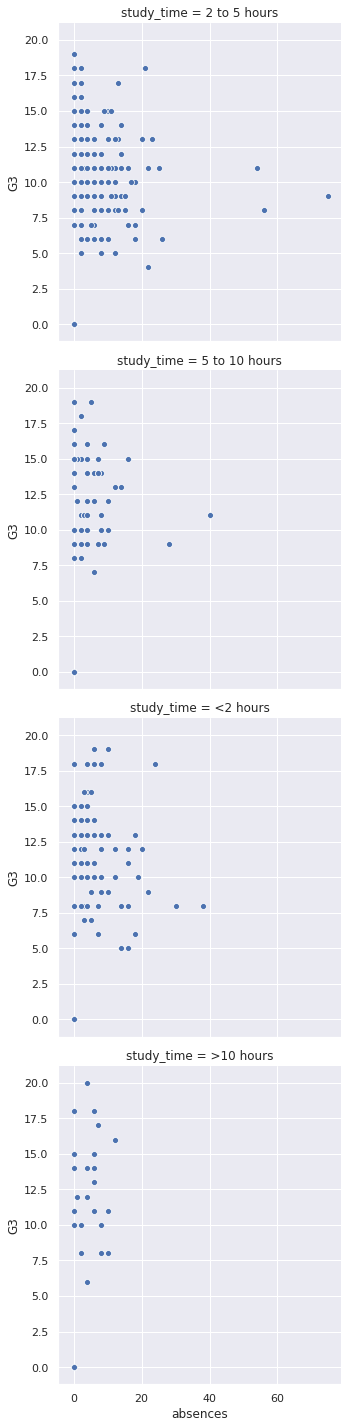

In [6]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time")

# Show plot
plt.show()

**Note** : Karena subplot ini memiliki rentang yang besar pada nilai x, lebih mudah untuk membacanya diatur dalam baris daripada kolom.

### Creating two-factor subplots

Mari kita lanjutkan melihat dataset `student_data`. Di sini, kami ingin menjawab pertanyaan berikut: *apakah nilai semester pertama siswa (`"G1"`) cenderung berkorelasi dengan nilai akhir mereka (`"G3"`)?*.

Ada banyak aspek kehidupan siswa yang dapat menghasilkan nilai akhir yang lebih tinggi atau lebih rendah di kelas. Misalnya, beberapa siswa menerima dukungan pendidikan tambahan dari sekolah mereka (`"schoolup"`) atau dari keluarga mereka (`"famsup"`), yang dapat menghasilkan nilai yang lebih tinggi. Mari kita coba untuk mengendalikan kedua faktor ini dengan membuat subplot berdasarkan apakah siswa menerima dukungan pendidikan tambahan dari sekolah atau keluarga mereka.

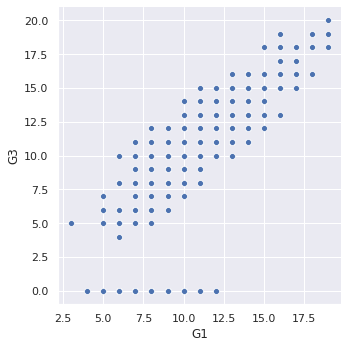

In [7]:
# Create a scatter plot of G1 vs. G3
sns.relplot(x="G1", y="G3", data=student_data, kind="scatter")

# Show plot
plt.show()

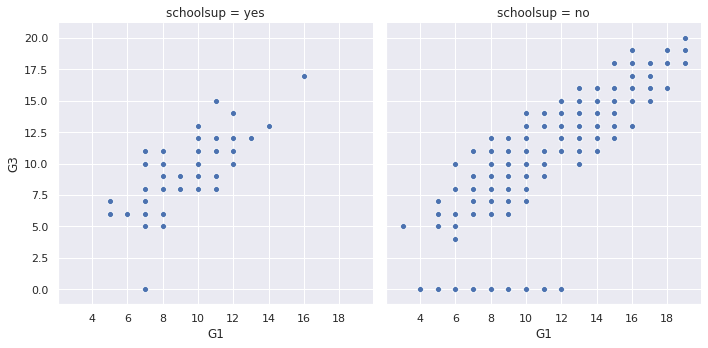

In [8]:
# Adjust to add subplots based on school support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter",
            col="schoolsup",
            col_order=["yes", "no"])

# Show plot
plt.show()

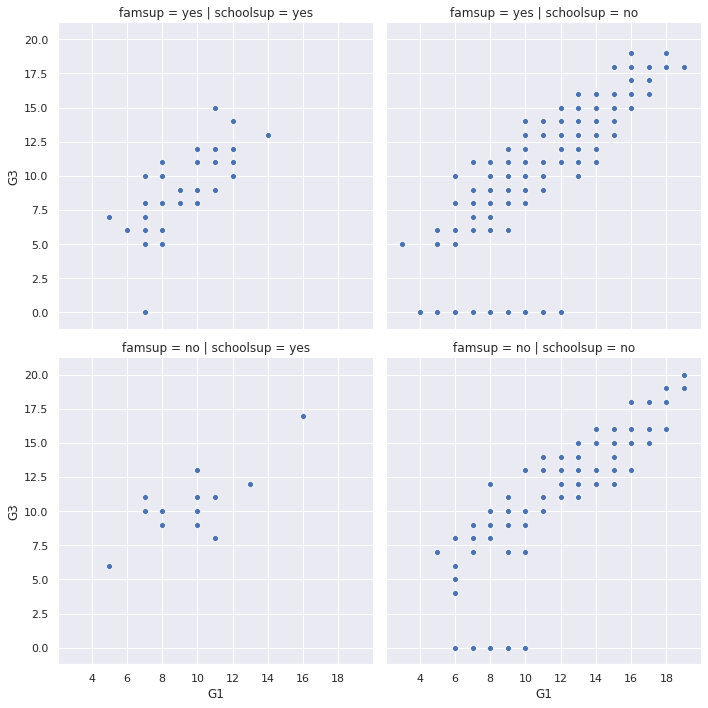

In [9]:
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            row="famsup",
            row_order=["yes", "no"],
            col_order=["yes", "no"])

# Show plot
plt.show()

**Note** : Sepertinya nilai semester pertama tidak berkorelasi dengan nilai akhir, terlepas dari jenis dukungan apa yang diterima siswa.

## Customizing scatter plots

### Changing the size of scatter plot points

Dalam latihan ini, kita akan mengeksplorasi dataset `mpg` dari Seaborn, yang berisi satu baris per model mobil dan mencakup informasi seperti tahun pembuatan mobil, jumlah mil per galon ("MPG") yang dicapai, kekuatan mesinnya (diukur dalam "horsepower/tenaga kuda"), dan negara asalnya.

Apa hubungan antara kekuatan mesin mobil (`"horsepower"`) dan efisiensi bahan bakarnya (`"mpg"`)? Dan bagaimana hubungan ini bervariasi dengan jumlah silinder (`"cylinders"`) yang dimiliki mobil? Ayo cari tahu.

Mari kita terus menggunakan `relplot()` alih-alih `scatterplot()` karena ia menawarkan lebih banyak fleksibilitas.

In [11]:
# Load data
mpg = pd.read_csv("datasets/mpg.csv")

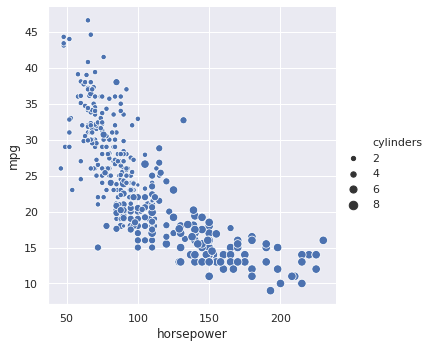

In [12]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", data=mpg, kind="scatter", size="cylinders")

# Show plot
plt.show()

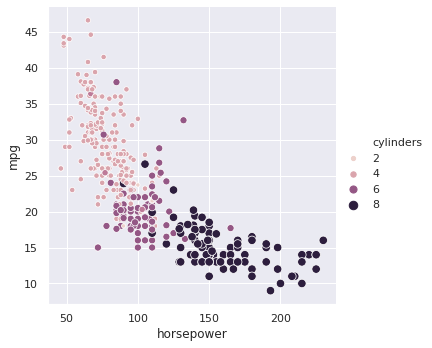

In [13]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders",
            hue="cylinders")

# Show plot
plt.show()

**Note** : Mobil dengan tenaga kuda yang lebih tinggi cenderung mendapatkan jumlah mil yang lebih rendah per galon. Mereka juga cenderung memiliki jumlah silinder yang lebih tinggi.

### Changing the style of scatter plot points

Mari kita terus mengeksplorasi dataset `mpg` dari Seaborn dengan melihat hubungan antara seberapa cepat mobil dapat berakselerasi (`"acceleration"`) dan efisiensi bahan bakarnya (`"mpg"`). Apakah properti ini berbeda di setiap negara asal (`"origin"`)?

Perhatikan bahwa variabel `"acceleration"` adalah waktu untuk berakselerasi dari 0 hingga 60 mil per jam, dalam detik. Nilai yang lebih tinggi menunjukkan akselerasi yang lebih lambat.

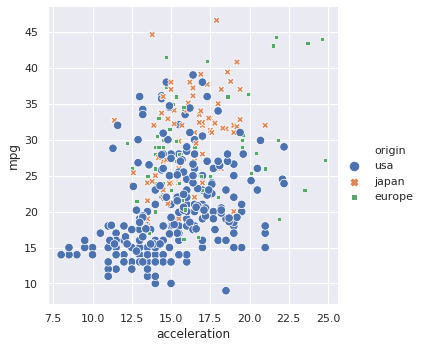

In [14]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(x="acceleration", y="mpg", data=mpg, hue="origin", style="origin", size="origin", kind="scatter")

# Show plot
plt.show()

**Note** : Mobil dari AS cenderung berakselerasi lebih cepat dan mendapatkan jarak tempuh mil per galon yang lebih rendah dibandingkan mobil dari Eropa dan Jepang.

## Introduction to line plots

### Interpreting line plots

Dalam latihan ini, kami akan terus mengeksplorasi dataset `mpg` dari Seaborn, yang berisi satu baris per model mobil dan mencakup informasi seperti tahun pembuatan mobil, efisiensi bahan bakarnya (diukur dalam "miles per gallon" atau "MPG"), dan negara asalnya (AS, Eropa, atau Jepang).

Bagaimana mil rata-rata per galon yang dicapai oleh mobil-mobil ini berubah seiring waktu? Mari kita gunakan plot garis untuk mencari tahu!

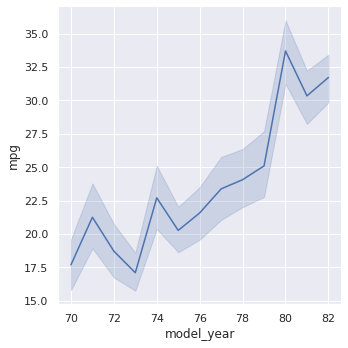

In [15]:
# Create line plot
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line")

# Show plot
plt.show()

**Question**

Apa interpretasi yang benar dari alur cerita ini?

* Mil rata-rata per galon telah meningkat seiring waktu.
* Kita dapat yakin 95% bahwa rata-rata mil per galon untuk semua mobil pada tahun 1970 adalah antara 16 dan 20 mil per galon.
* Plot ini mengasumsikan bahwa data kami adalah sampel acak dari semua mobil di AS, Eropa, dan Jepang.

**Note** : Daerah yang diarsir mewakili interval kepercayaan untuk rata-rata, bukan distribusi pengamatan.

### Visualizing standard deviation with line plots

Dalam latihan terakhir, kami melihat bagaimana mil rata-rata per galon yang dicapai oleh mobil telah berubah seiring waktu. Sekarang mari kita gunakan plot garis untuk memvisualisasikan bagaimana distribusi mil per galon telah berubah seiring waktu.

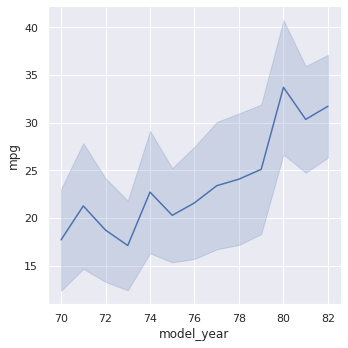

In [16]:
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line", ci="sd")

# Show plot
plt.show()

**Note** : Tidak seperti plot di latihan terakhir, plot ini menunjukkan kepada kita distribusi mil per galon untuk semua mobil di setiap tahun.

### Plotting subgroups in line plots

Mari kita terus melihat pada dataset `mpg`. Kami telah melihat bahwa rata-rata mil per galon untuk mobil telah meningkat seiring waktu, tetapi bagaimana tenaga kuda rata-rata untuk mobil berubah seiring waktu? Dan apakah tren ini berbeda menurut negara asal?

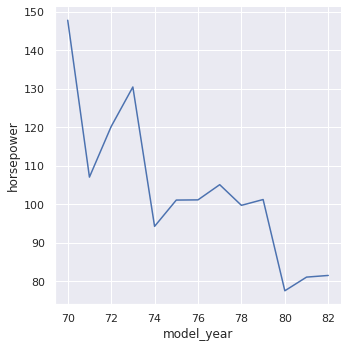

In [17]:
# Create line plot of model year vs. horsepower
sns.relplot(x="model_year", y="horsepower", data=mpg, kind="line", ci=None)

# Show plot
plt.show()

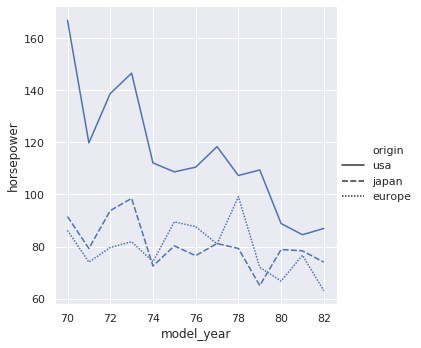

In [18]:
# Change to create subgroups for country of origin
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin")

# Show plot
plt.show()

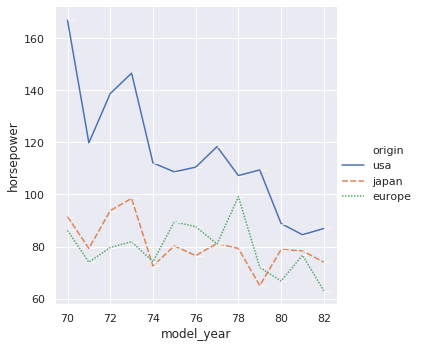

In [19]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", marker=True,
            hue="origin")

# Show plot
plt.show()

**Note** : Sekarang kami telah menambahkan subkelompok, kita dapat melihat bahwa tren penurunan tenaga kuda ini lebih terasa di antara mobil-mobil dari AS.